In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('h1n1 data/h1n1_vaccine_prediction.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
pd.set_option('display.max_columns',100)
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [9]:
data[data.isnull().any(axis=1)]

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0


In [10]:
data.isna().sum().sort_values(ascending=False)

has_health_insur             12274
income_level                  4423
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
housing_status                2042
employment                    1463
marital_status                1408
qualification                 1407
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_children                 249
no_of_adults                   249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
h1n1_vaccine        

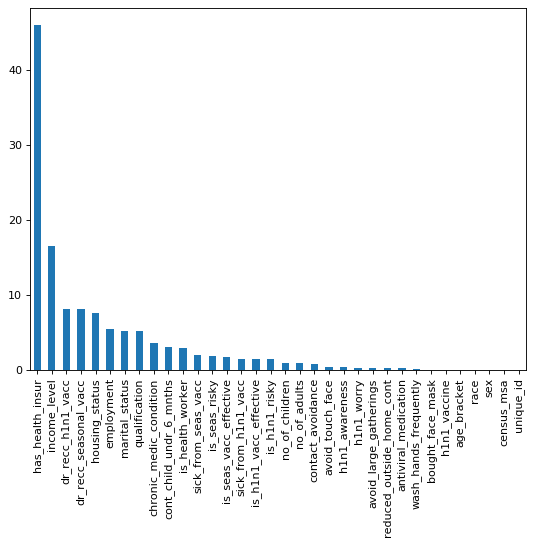

In [15]:
miss_percent=((data.isna().sum()/len(data))*100).sort_values(ascending=False)
figure(figsize=(8, 6), dpi=80)
miss_percent.plot.bar()


In [16]:
miss_cols=list(miss_percent[miss_percent>10].index)
data1=data.drop(data[miss_cols],axis=1)

In [17]:
clean = {'age_bracket':{'18 - 34 Years':1,'35 - 44 Years':2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5},
        'qualification':{'< 12 Years':1,'12 Years':2,'College Graduate':3,'Some College':4}}
data1=data1.replace(clean)

In [18]:
def analysis(df,graph_per_row,max_graphs):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col]>1 and nunique[col]<50]]
    nrow, ncol = df.shape
    colname = list(df)
    graph_row = (ncol+graph_per_row-1)/graph_per_row
    plt.figure(figsize=(12*graph_per_row,8*graph_row))
    for i in range(min(ncol,max_graphs)):
        plt.subplot(graph_row,graph_per_row,i+1)
        coltype = df.iloc[:,i]
        if (not np.issubdtype(type(coltype.iloc[0]),np.str)):
            sns.countplot(colname[i], hue='h1n1_vaccine',data=df)
        else:
            coltype.hist()
        plt.title(f'{colname[i]}')
        plt.xticks(rotation=60)
    plt.show()

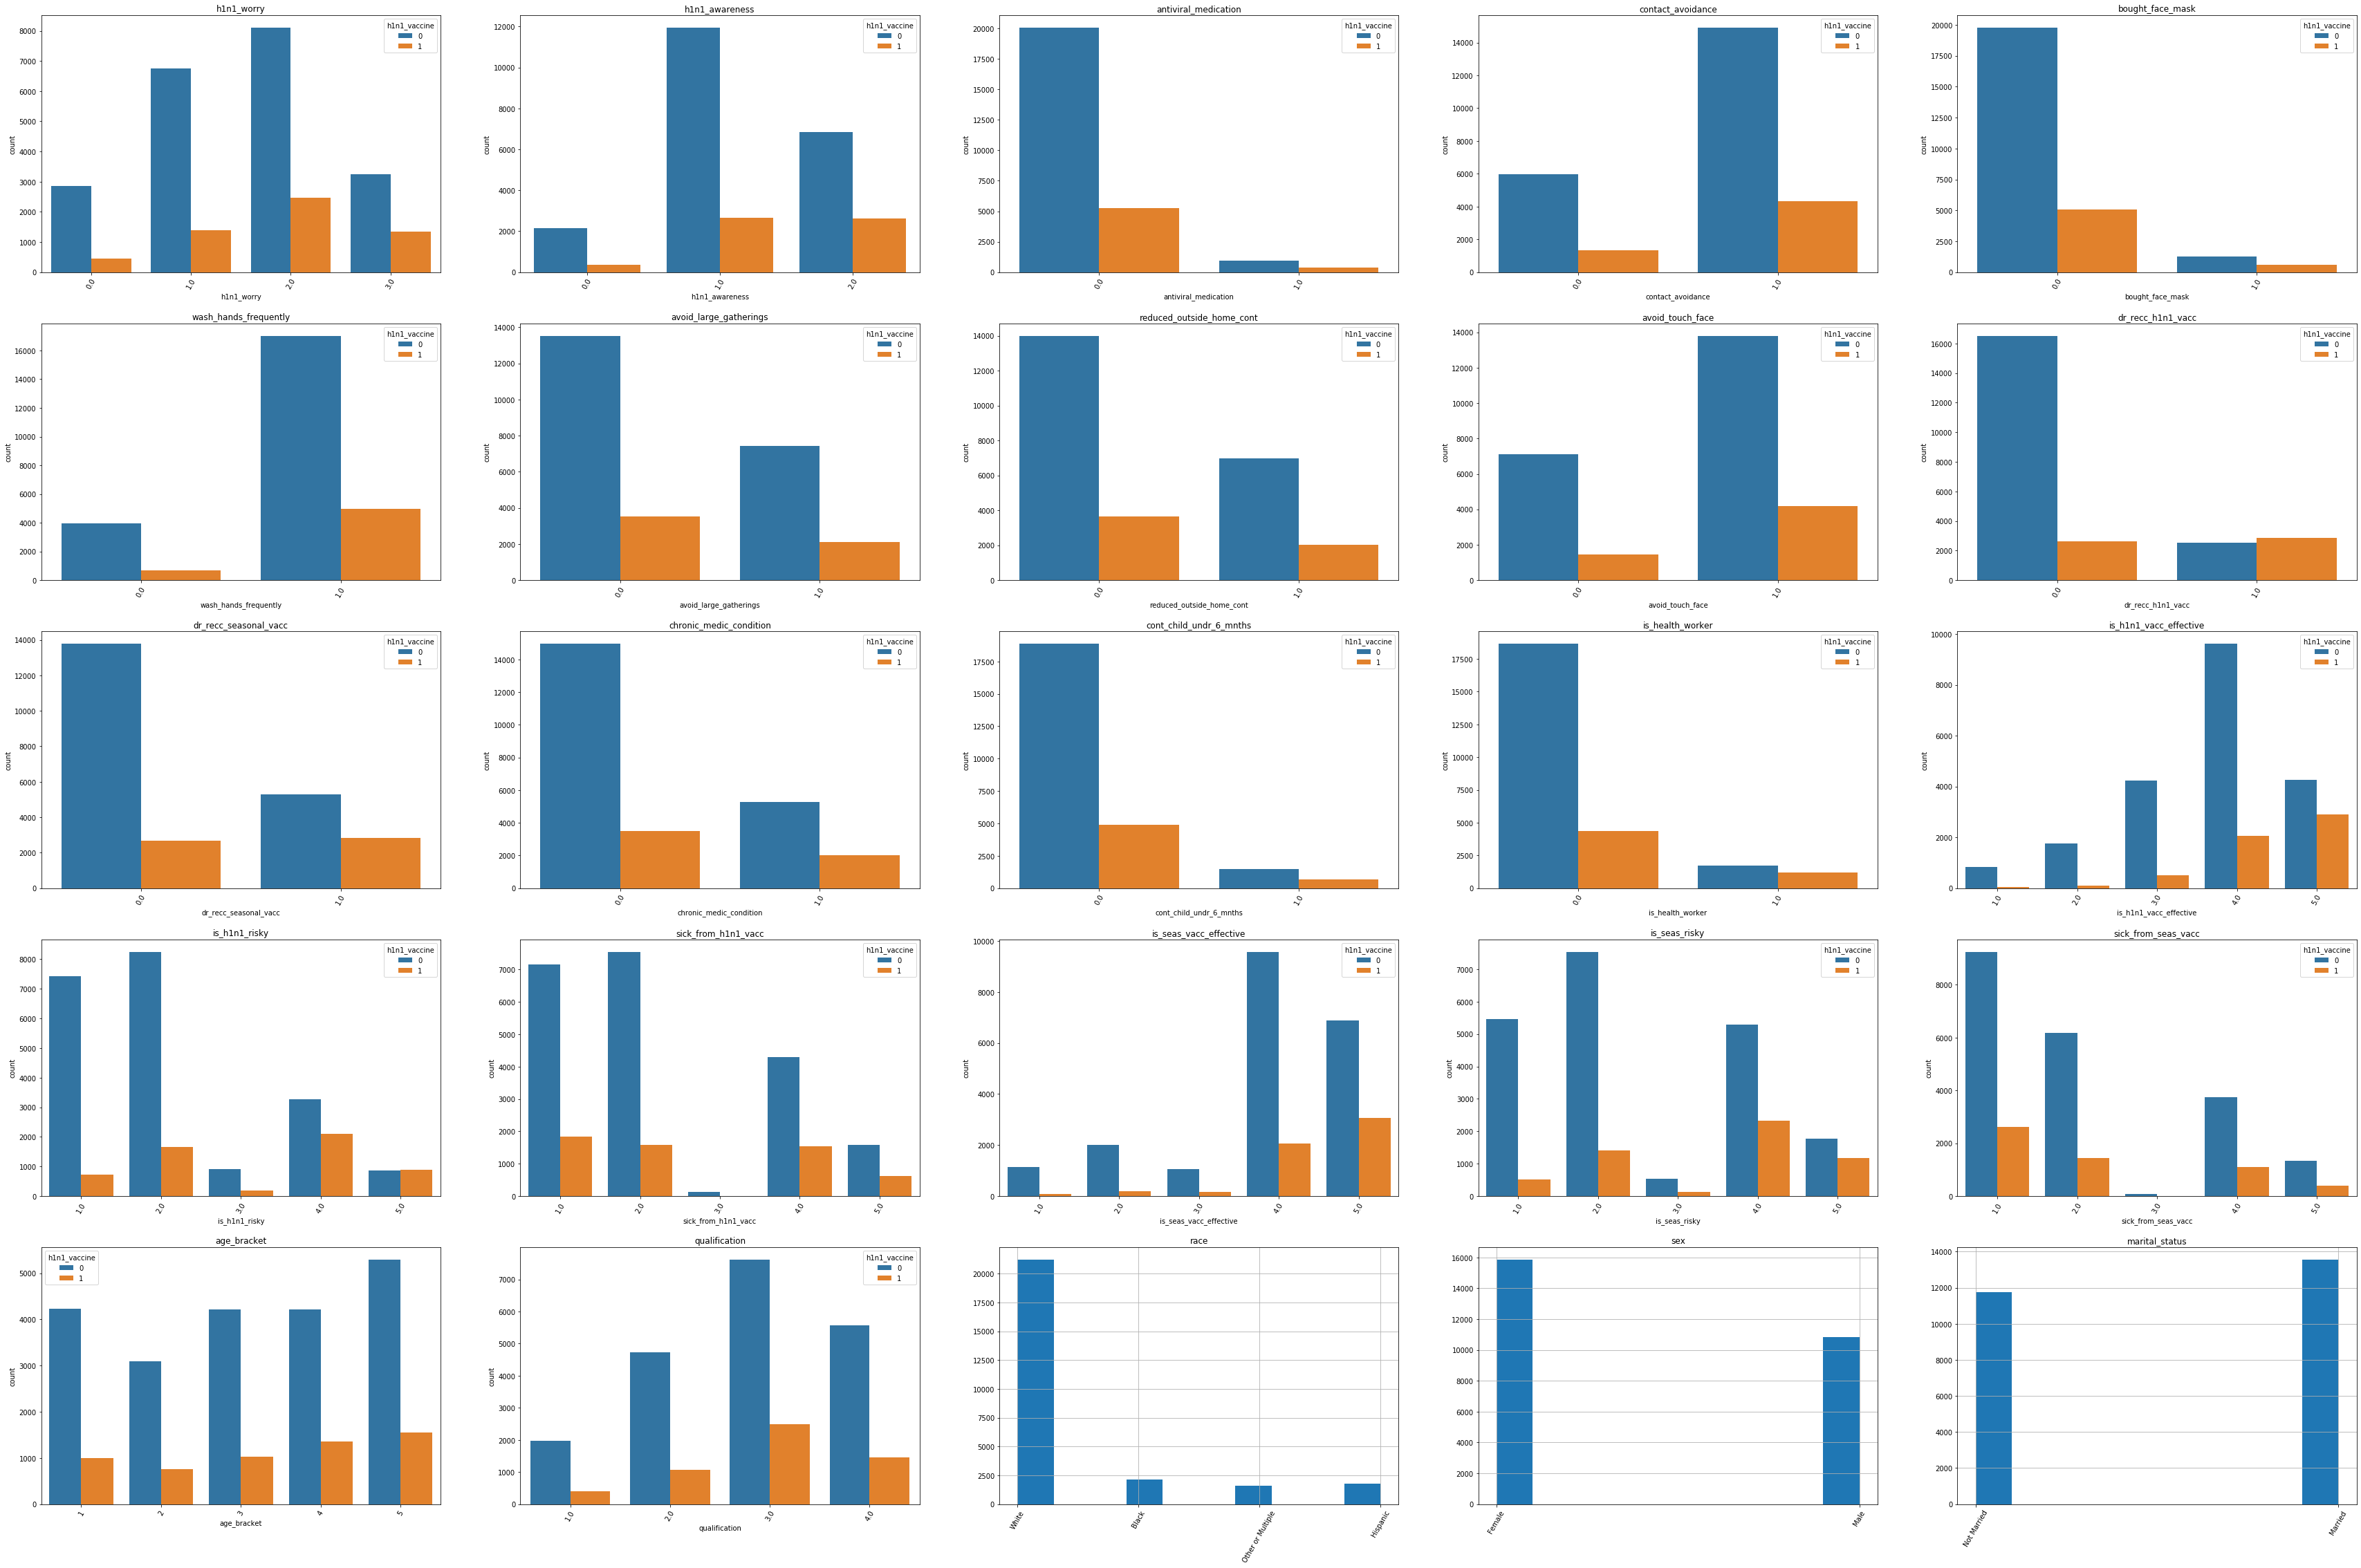

In [21]:
analysis(data1,5,25)

In [22]:
num_na = data1[data1.select_dtypes(exclude='object').columns].isna().sum().sort_values(ascending=False)
num_na = num_na[num_na!=0].index
num_na

Index(['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'qualification',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'sick_from_seas_vacc', 'is_seas_risky',
       'is_seas_vacc_effective', 'sick_from_h1n1_vacc',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'no_of_children',
       'no_of_adults', 'contact_avoidance', 'avoid_touch_face',
       'h1n1_awareness', 'h1n1_worry', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'antiviral_medication',
       'wash_hands_frequently', 'bought_face_mask'],
      dtype='object')

In [23]:
pd.set_option('display.max_rows',200,'display.max_columns',30)
data1[num_na]=data1[num_na].apply(lambda x: x.fillna(int(x.mode())))

In [24]:
data2 = data1.dropna()

In [25]:
obj = data2.select_dtypes(include='object').columns
obj

Index(['race', 'sex', 'marital_status', 'housing_status', 'employment',
       'census_msa'],
      dtype='object')

In [26]:
[print(i,'-->',data2[i].unique()) for i in obj]

race --> ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex --> ['Female' 'Male']
marital_status --> ['Not Married' 'Married']
housing_status --> ['Own' 'Rent']
employment --> ['Not in Labor Force' 'Employed' 'Unemployed']
census_msa --> ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


[None, None, None, None, None, None]

In [27]:
clean = {
        'employment':{'Not in Labor Force':1,'Employed':2,'Unemployed':3},
        'census_msa':{'Non-MSA':1,'MSA, Not Principle  City':2,'MSA, Principle City':3},
         'housing_status':{'Own':1,'Rent':2},
        
}
data3=data2.replace(clean)

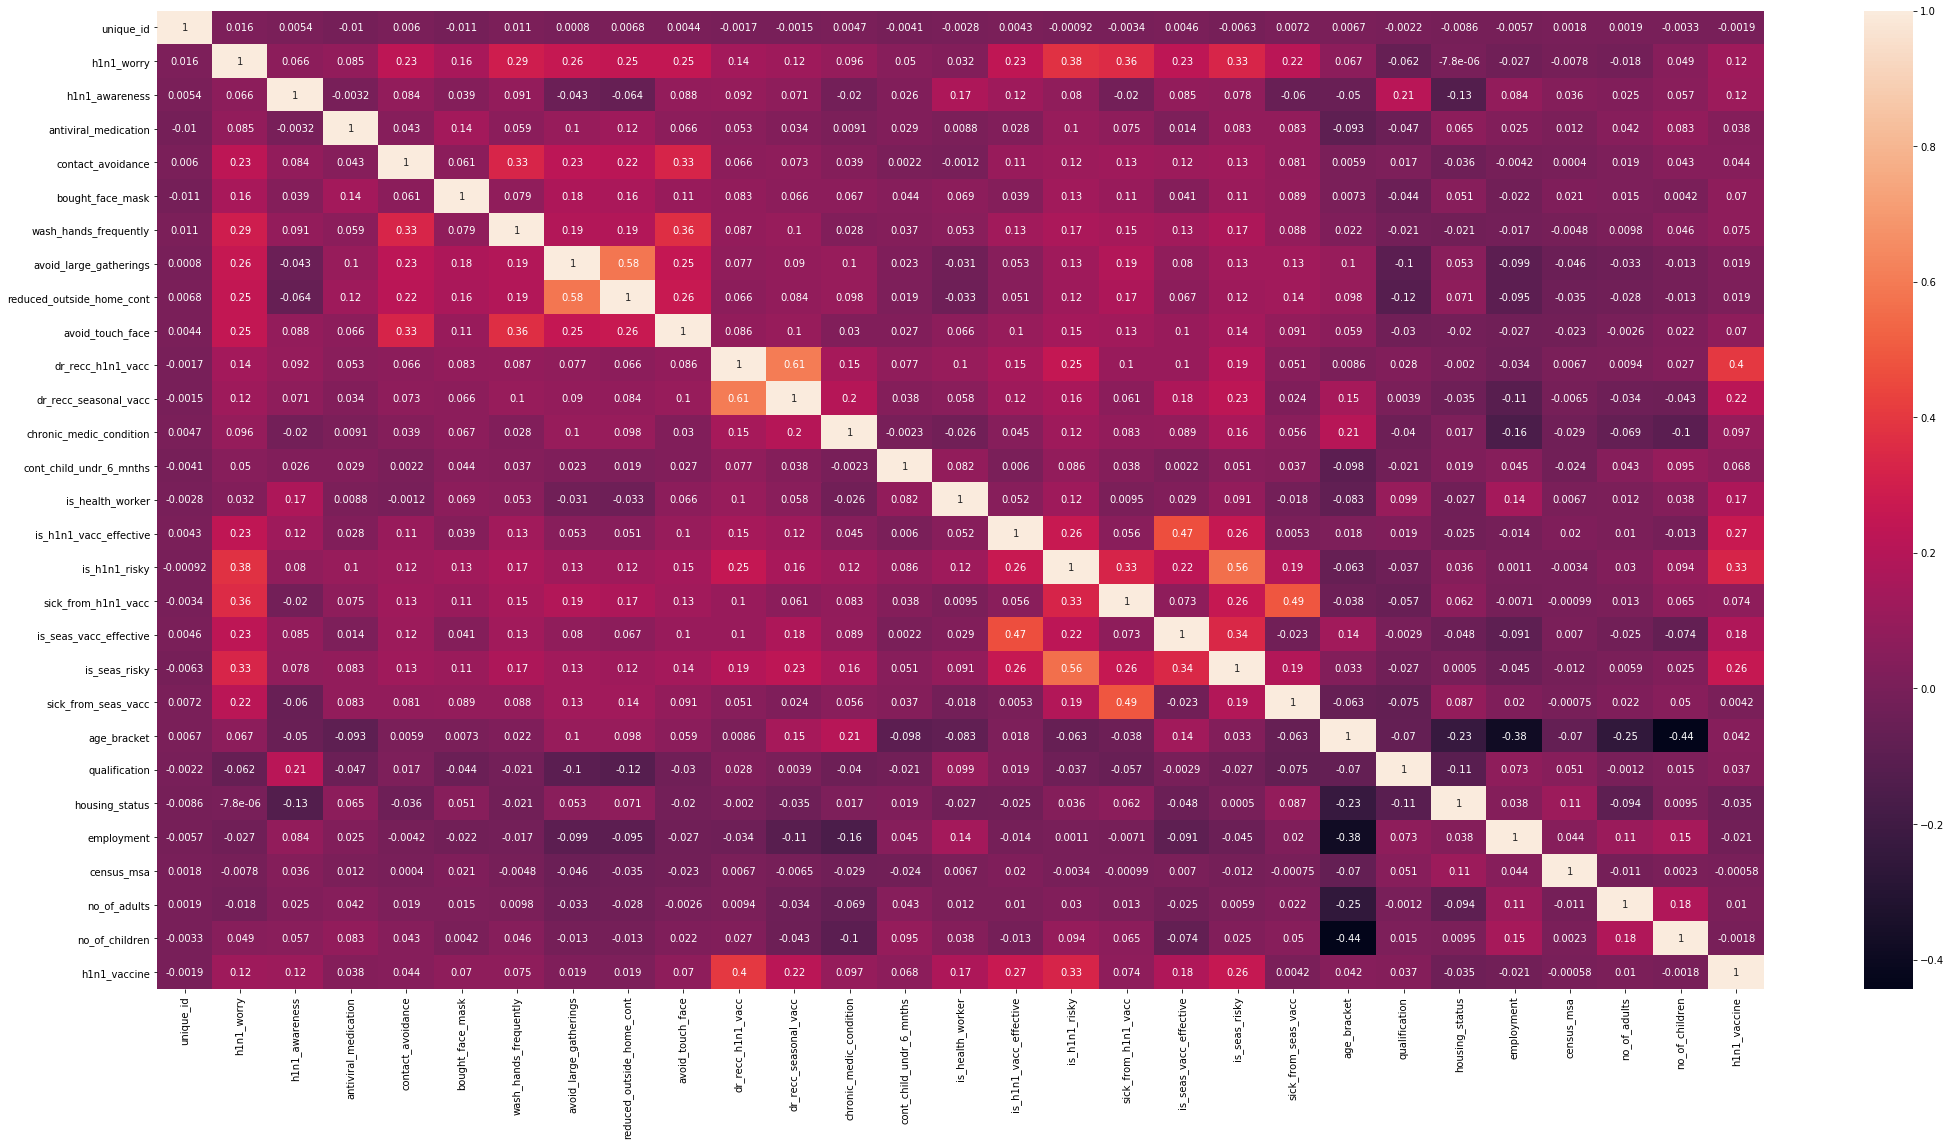

In [31]:
plt.figure(figsize=(36,18))
corr = data3.corr()
sns.heatmap(corr,annot=True)
plt.savefig('h1n1_heatmap.png')
plt.show()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Variables"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

We'll use 2.5 as threshold

In [38]:
df1=data3.drop(data3[['unique_id','race','sex','marital_status','is_h1n1_vacc_effective','is_seas_vacc_effective']],axis=1)
df2 = df1.iloc[:,:-1]
vif_scores(df2)


,Independent Variables,VIF Scores
0,h1n1_worry,6.062426
1,h1n1_awareness,5.944737
2,antiviral_medication,1.106453
3,contact_avoidance,4.606837
4,bought_face_mask,1.158201
5,wash_hands_frequently,7.327666
6,avoid_large_gatherings,2.498297
7,reduced_outside_home_cont,2.415799
8,avoid_touch_face,4.035916
9,dr_recc_h1n1_vacc,2.108760


In [39]:
one_hot = data3[['race','sex','marital_status']]
one_hot= pd.get_dummies(one_hot)
one_hot.columns

Index(['race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'marital_status_Married',
       'marital_status_Not Married'],
      dtype='object')

In [40]:
data4= data3.drop(data3[['unique_id','race','sex','marital_status']],axis=1)

In [41]:
data5 = pd.concat([data4,one_hot],axis = 1)

In [42]:
data5.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,...,qualification,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1.0,1,1,1,0.0,0.0,0,0,0,0,1,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,...,2.0,2,2,2,0.0,0.0,0,0,0,0,1,0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,...,3.0,1,2,2,2.0,0.0,0,0,0,0,1,0,1,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,...,2.0,2,1,3,0.0,0.0,0,0,0,0,1,1,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,1,2,2,1.0,0.0,0,0,0,0,1,1,0,1,0


In [69]:
x = data5.drop(['h1n1_vaccine','race_Black', 'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male', 'marital_status_Married',
       'marital_status_Not Married','is_h1n1_vacc_effective','is_seas_vacc_effective'],axis=1)
y= data5['h1n1_vaccine']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [71]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred= model.predict(x_test)
y_pred[0:3]

array([0, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [135]:
def res(y_test,y_valid):
    cm1 = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm1,['0', '1']).plot(values_format='d').ax_.set(ylabel = 'Actual value', xlabel ='Predicted value')
    print('Accuracy',accuracy_score(y_test,y_valid))
    print(classification_report(y_test,y_valid))
    plt.show()

Accuracy 0.8302658486707567
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3843
           1       0.67      0.41      0.51      1047

    accuracy                           0.83      4890
   macro avg       0.76      0.68      0.70      4890
weighted avg       0.81      0.83      0.81      4890



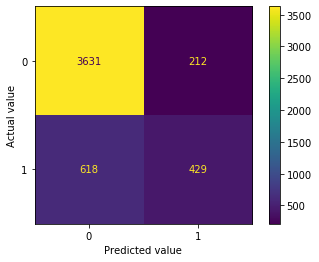

In [136]:
res(y_test,y_pred)

In [137]:
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]

Accuracy 0.7803680981595092
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3843
           1       0.49      0.70      0.58      1047

    accuracy                           0.78      4890
   macro avg       0.70      0.75      0.71      4890
weighted avg       0.82      0.78      0.79      4890



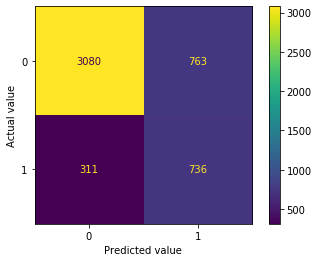

In [138]:
#predict using custom thershold
Thersold = 0.23
y_pred1 =  np.where(y_prob>Thersold,1,0)

res(y_test,y_pred1)

[13:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.8233128834355828
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3843
           1       0.62      0.44      0.52      1047

    accuracy                           0.82      4890
   macro avg       0.74      0.68      0.70      4890
weighted avg       0.81      0.82      0.81      4890



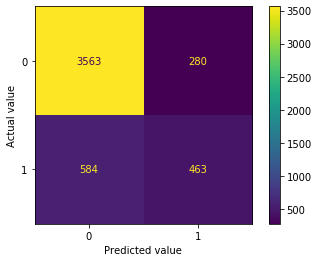

In [139]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)
res(y_test,y_pred_xgb)